<img src="stackoverflow-1.png"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Stack Overflow

### Importing packages

In [1]:
import numpy as np
import pandas as pd
from urllib.request import urlretrieve
import zipfile
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Unzipping and Creating a DataFrame

In [2]:
#The dataset contains responses to an annual survey conducted by StackOverflow. 
with zipfile.ZipFile('stack-overflow-developer-survey-2020.zip', 'r') as zip_ref:
    zip_ref.extractall('temp')
urlretrieve('http://localhost:8888/edit/Downloads/Exploratory_Data_Analysis_using_Python/temp/survey_results_public.csv')
survey_raw_df = pd.read_csv('temp/survey_results_public.csv')
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


### Data Preparation & Cleaning

In [3]:
#While the survey responses contain a lot of information, I limited the analysis to the following columns
selected_columns = [
    # Demographics
    'Country','Age','EdLevel','UndergradMajor',
    # Programming experience
    'Hobbyist','Age1stCode','YearsCode','YearsCodePro','LanguageWorkedWith','LanguageDesireNextYear','NEWLearn','NEWStuck',
    # Employment
    'Employment','DevType','WorkWeekHrs','JobSat','JobFactors','NEWOvertime','NEWEdImpt'
]

In [4]:
#Creating a copy to apply the modifications without affecting the original data frame
survey_df = survey_raw_df[selected_columns].copy()

In [5]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   EdLevel                 57431 non-null  object 
 3   UndergradMajor          50995 non-null  object 
 4   Hobbyist                64416 non-null  object 
 5   Age1stCode              57900 non-null  object 
 6   YearsCode               57684 non-null  object 
 7   YearsCodePro            46349 non-null  object 
 8   LanguageWorkedWith      57378 non-null  object 
 9   LanguageDesireNextYear  54113 non-null  object 
 10  NEWLearn                56156 non-null  object 
 11  NEWStuck                54983 non-null  object 
 12  Employment              63854 non-null  object 
 13  DevType                 49370 non-null  object 
 14  WorkWeekHrs             41151 non-null

In [6]:
#Converting the data types
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')
survey_df= survey_df.convert_dtypes()
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  string 
 1   Age                     45446 non-null  Float64
 2   EdLevel                 57431 non-null  string 
 3   UndergradMajor          50995 non-null  string 
 4   Hobbyist                64416 non-null  string 
 5   Age1stCode              57473 non-null  Int64  
 6   YearsCode               56784 non-null  Int64  
 7   YearsCodePro            44133 non-null  Int64  
 8   LanguageWorkedWith      57378 non-null  string 
 9   LanguageDesireNextYear  54113 non-null  string 
 10  NEWLearn                56156 non-null  string 
 11  NEWStuck                54983 non-null  string 
 12  Employment              63854 non-null  string 
 13  DevType                 49370 non-null  string 
 14  WorkWeekHrs             41151 non-null

In [7]:
#Some basic statistics about numeric columns
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [8]:
#Ignoring the rows where the age is higher than 100 years or lower than 10 years
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

#Ignoring the rows where the work week hours is more than 100 hours
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 100].index, inplace=True)

In [9]:
#A sample of rows from the data frame to make sure everthing looks good
survey_df.sample(10)

,Country,Age,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
8801,Netherlands,20.0,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,15,3,<NA>,PHP,C++;Java,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",40.0,Slightly satisfied,Industry that I’d be working in;How widely use...,Rarely: 1-2 days per year or less,Fairly important
4247,Indonesia,40.0,Some college/university study without earning ...,"A social science (such as anthropology, psycho...",Yes,15,25,20,Assembly;Bash/Shell/PowerShell;C;C#;C++;HTML/C...,C#;Rust;TypeScript,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Database administrator;Developer, back-end;Dev...",50.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Somewhat important
53749,India,16.0,"Secondary school (e.g. American high school, G...",<NA>,Yes,12,4,<NA>,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Bash/Shell/PowerShell;Dart;Go;HTML/CSS;Java;Ja...,Every few months,Visit Stack Overflow;Watch help / tutorial videos,Student,<NA>,<NA>,<NA>,Specific department or team I’d be working on;...,<NA>,<NA>
22325,United Kingdom,23.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18,5,4,Bash/Shell/PowerShell;C;C++;HTML/CSS;JavaScrip...,Bash/Shell/PowerShell;C;C++;Go;Haskell;JavaScr...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Data or business analyst;Data scientist or mac...,35.0,Slightly dissatisfied,Industry that I’d be working in;Flex time or a...,Rarely: 1-2 days per year or less,Very important
33403,United States,34.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,19,14,10,JavaScript;Objective-C;Swift,Python,Once every few years,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Neither satisfied nor dissatisfied,Diversity of the company or organization;Langu...,Rarely: 1-2 days per year or less,Fairly important
1912,United States,22.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Mathematics or statistics,Yes,17,5,<NA>,C++;HTML/CSS;Java;JavaScript;Python;R;SQL,HTML/CSS;Java;JavaScript;Python;R;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, QA or test",<NA>,<NA>,<NA>,<NA>,Very important
61697,India,<NA>,"Professional degree (JD, MD, etc.)","Another engineering discipline (such as civil,...",Yes,16,1,2,HTML/CSS;Python;R;SQL,Dart;HTML/CSS;Kotlin;Python;R,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,Academic researcher;Data or business analyst;D...,25.0,Neither satisfied nor dissatisfied,Industry that I’d be working in;Flex time or a...,Occasionally: 1-2 days per quarter but less th...,Very important
36908,Netherlands,<NA>,<NA>,<NA>,Yes,<NA>,<NA>,<NA>,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Every few months,<NA>,Employed full-time,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
18354,United States,26.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,11,15,5,Java;Python;SQL,JavaScript;Kotlin;Python;SQL;Swift;TypeScript,Once every few years,Call a coworker or friend;Do other work and co...,Employed full-time,"Developer, back-end",40.0,Slightly satisfied,Financial performance or funding status of the...,Occasionally: 1-2 days per quarter but less th...,Critically important
16123,United Kingdom,22.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12,6,2,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,C#

In [21]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

### Exploratory Analysis and Visualization

In [10]:
#Top 10 countries from which there are responses in the survey
topCountries = survey_df.Country.value_counts().head(10)
topCountries 

United States     12466
India              8384
United Kingdom     3893
Germany            3879
Canada             2188
France             1893
Brazil             1811
Netherlands        1340
Poland             1263
Australia          1208
Name: Country, dtype: Int64

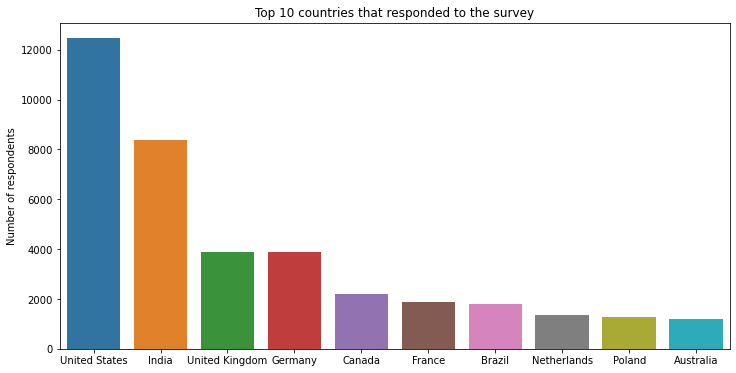

In [45]:
plt.figure(figsize=(12,6))
plt.title('Top 10 countries that responded to the survey')
sns.barplot(x=topCountries.index, y=topCountries)
plt.ylabel('Number of respondents')
plt.show()

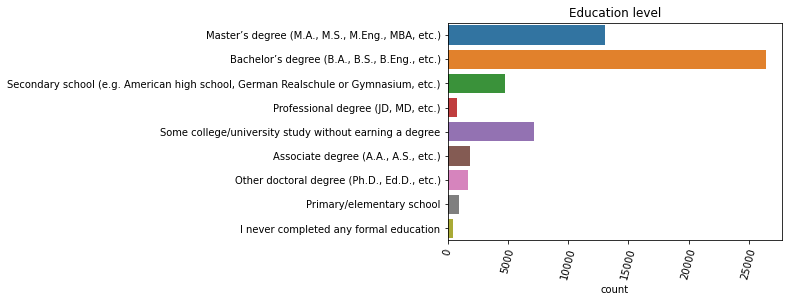

In [13]:
#Education level of the repondents
sns.countplot(y=survey_df.EdLevel)
plt.title('Education level of the repondents')
plt.ylabel(None)

In [22]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               60.218467
HTML/CSS                 56.119877
SQL                      48.714717
Python                   39.243146
Java                     35.787197
Bash/Shell/PowerShell    29.449476
C#                       27.971245
PHP                      23.254909
TypeScript               22.585815
C++                      21.263187
C                        19.364827
Go                        7.817508
Kotlin                    6.927458
Ruby                      6.280148
Assembly                  5.500576
VBA                       5.416550
Swift                     5.265615
R                         5.100675
Rust                      4.545172
Objective-C               3.625556
Dart                      3.529082
Scala                     3.175863
Perl                      2.780631
Haskell                   1.893692
Julia                     0.801357
dtype: float64

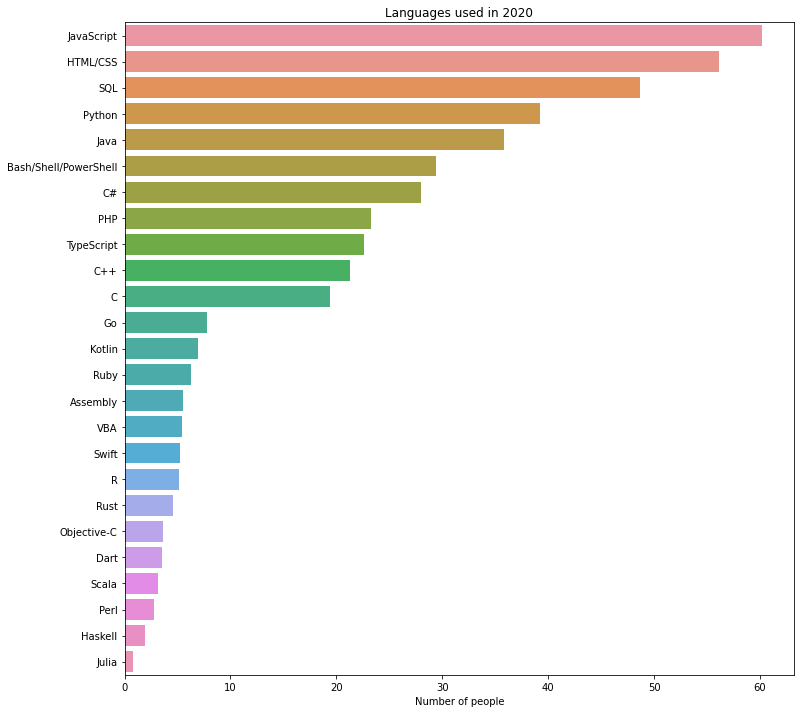

In [44]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in 2020");
plt.xlabel('Number of people')
plt.show()

In [27]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.398251
JavaScript               40.632683
HTML/CSS                 32.206766
SQL                      30.985280
TypeScript               26.577039
C#                       21.193166
Java                     20.572309
Go                       19.543771
Bash/Shell/PowerShell    18.182243
Rust                     16.400585
C++                      15.130862
Kotlin                   14.835216
PHP                      11.013600
C                         9.437339
Swift                     8.743348
Dart                      7.347587
R                         6.625587
Ruby                      6.488657
Scala                     5.366757
Haskell                   4.649426
Assembly                  3.815392
Julia                     2.572122
Objective-C               2.357390
Perl                      1.780101
VBA                       1.632278
dtype: float64

Text(0.5, 0, 'count')

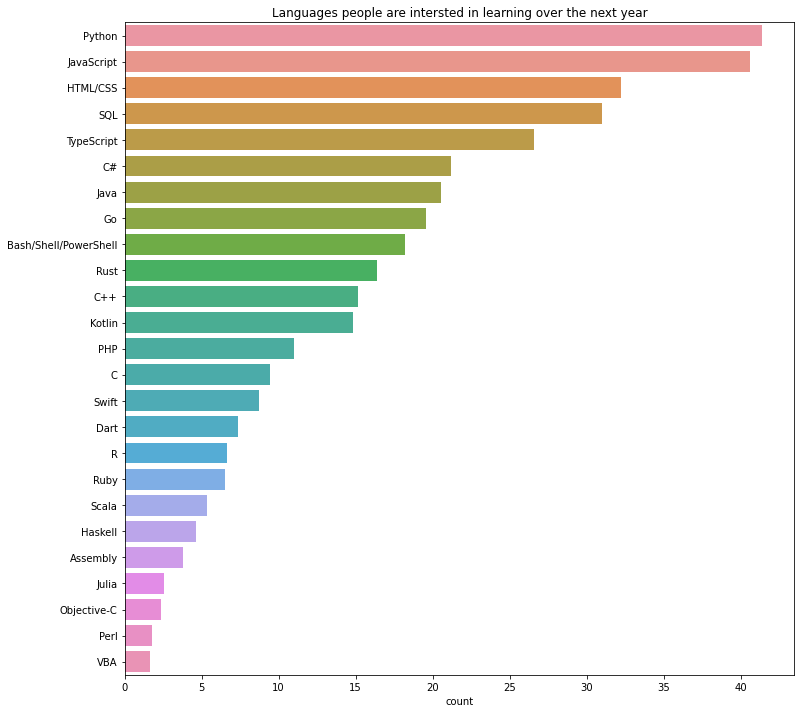

In [28]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('Number of people')

In [30]:
languages_loved_df = languages_worked_df & languages_interested_df
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)
languages_loved_percentages

Rust                     86.100650
TypeScript               67.089218
Python                   66.657415
Kotlin                   62.780773
Go                       62.241242
Dart                     62.037037
Julia                    61.941748
C#                       59.657321
Swift                    59.456265
JavaScript               58.325581
SQL                      56.613537
Bash/Shell/PowerShell    53.714467
HTML/CSS                 53.474186
Scala                    53.258207
Haskell                  51.684470
R                        44.417328
Java                     44.093221
C++                      43.439444
Ruby                     42.814668
PHP                      37.236534
C                        33.057453
Assembly                 29.278642
Perl                     28.539452
Objective-C              23.304721
VBA                      19.620799
dtype: float64

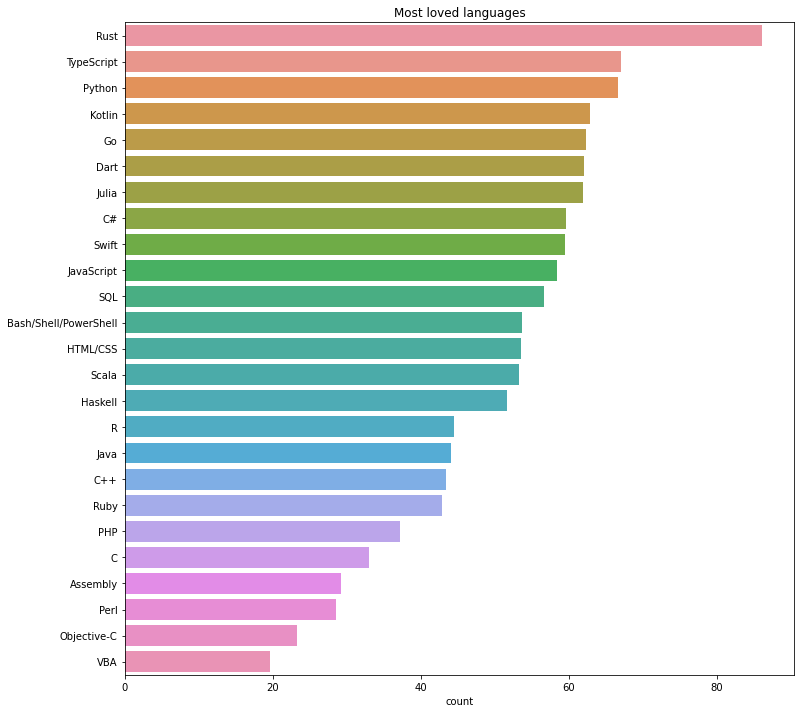

In [31]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

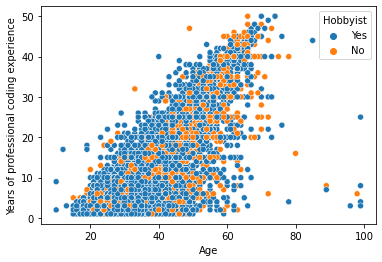

In [34]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience")

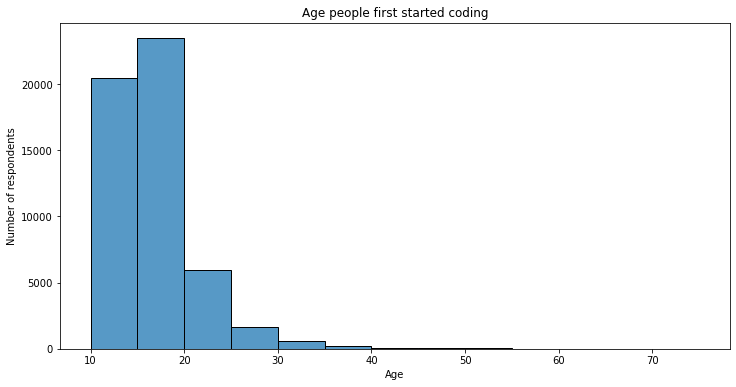

In [43]:
plt.figure(figsize=(12, 6))
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.title('Age people first started coding')
sns.histplot(survey_df.Age1stCode, bins=np.arange(10,80,5))
plt.show()